In [1]:
from tournament import tournament
from reporting import Reporting
import importlib
from collections import namedtuple
from game_agent_comp import CustomPlayerComp
from value_functions import improved_score_fast_x2,improved_score_fast,\
    improved_score_fast_x3, partition_score_x2
from sample_players import null_score
from policy import SimplePolicy
#importlib.reload(reporting)
Agent = namedtuple("Agent", ["player", "name"])

#r = Reporting()
#r.report = []

CUSTOM_ARGS = {"method": 'alphabeta', 'iterative': True}

my_part_x2 = Agent(CustomPlayerComp(score_fn=partition_score_x2, **CUSTOM_ARGS),
                   "Partitioning with two steps")
my_x3 = Agent(CustomPlayerComp(score_fn=improved_score_fast_x3, **CUSTOM_ARGS),
      "improved, three steps exact")
my_x1 = Agent(CustomPlayerComp(score_fn=improved_score_fast, **CUSTOM_ARGS),
      "Faster improved")                        

my_x2 = Agent(CustomPlayerComp(score_fn=improved_score_fast_x2,**CUSTOM_ARGS), 
                  "improved, two steps exact, with reporting")

my_null = Agent(CustomPlayerComp(score_fn=null_score,method = 'minimax', iterative = True),
                       "Null score minimax ID")

policy_5 = SimplePolicy(5,  improved_score_fast_x2 )
policy_3 = SimplePolicy(3,  improved_score_fast_x2 )

my_policy_x2_5 = Agent(CustomPlayerComp(score_fn=improved_score_fast_x2,
                                        policy = policy_5, **CUSTOM_ARGS), 
                  "simple policy, max 3 moves")

my_policy_x2_3 = Agent(CustomPlayerComp(score_fn=improved_score_fast_x2,
                                        policy = policy_3, **CUSTOM_ARGS), 
                  "simple policy, max 5 moves")

#test_agents = [my_policy_x2]#my_null,my_x1, my_x2 , my_x3, my_part_x2]

test_agents = [my_policy_x2_3, my_policy_x2_5, my_x1, my_x2 , my_x3, my_part_x2]

tournament(num_matches = 10, test_agents = test_agents)

49
49
49
49
49
49
49
49
49
49
49
49
49
49

This script evaluates the performance of the custom heuristic function by
comparing the strength of an agent using iterative deepening (ID) search with
alpha-beta pruning against the strength rating of agents using other heuristic
functions.  The `ID_Improved` agent provides a baseline by measuring the
performance of a basic agent using Iterative Deepening and the "improved"
heuristic (from lecture) on your hardware.  The `Student` agent then measures
the performance of Iterative Deepening and the custom heuristic against the
same opponents.


*************************
Evaluating: simple policy, max 5 moves
*************************

Playing Matches:
----------
  Match 1: simple policy, max 5 moves vs   Random    	Result: 38 to 2
  Match 2: simple policy, max 5 moves vs   MM_Null   	Result: 38 to 2
  Match 3: simple policy, max 5 moves vs   MM_Open   	Result: 26 to 14
  Match 4: simple policy, max 5 moves vs MM_Improved 	Result: 30 to 10
  Mat

C:\Users\Egor\Dropbox\GitHub\aind\aind-isolation\tournament.py:106: UserWarning: One or more agents lost a match this round due to timeout. The get_move() function must return before time_left() reaches 0 ms. You will need to leave some time for the function to return, and may need to increase this margin to avoid timeouts during  tournament play.
  warnings.warn(TIMEOUT_WARNING)


	Result: 38 to 2
  Match 2: Faster improved vs   MM_Null   	Result: 37 to 3
  Match 3: Faster improved vs   MM_Open   	Result: 31 to 9
  Match 4: Faster improved vs MM_Improved 	Result: 27 to 13
  Match 5: Faster improved vs   AB_Null   	Result: 35 to 5
  Match 6: Faster improved vs   AB_Open   	Result: 30 to 10
  Match 7: Faster improved vs AB_Improved 	Result: 23 to 17
  Match 8: Faster improved vs ID_Improved 	Result: 20 to 20


Results:
----------
Faster improved     75.31%

*************************
Evaluating: improved, two steps exact, with reporting
*************************

Playing Matches:
----------
  Match 1: improved, two steps exact, with reporting vs   Random    	Result: 36 to 4
  Match 2: improved, two steps exact, with reporting vs   MM_Null   	Result: 33 to 7
  Match 3: improved, two steps exact, with reporting vs   MM_Open   	Result: 29 to 11
  Match 4: improved, two steps exact, with reporting vs MM_Improved 	Result: 31 to 9
  Match 5: improved, two steps exact, wi

In [2]:
# process the moves statistics
test_agents = [my_null,my_x1, my_x2, my_x3, my_part_x2,my_policy_x2_3,my_policy_x2_5]

r = Reporting()

depths = get_depths(r.report, test_agents, lambda x: (x['depth'],x['score']))
print(depths)

import pickle
try:
    with open('depths.pickle', 'rb') as handle:
        old_depths = pickle.load(handle)
except:
    old_depths={}

for p, d in old_depths.items():
    if p not in depths:
        depths[p]=d
    
with open('depths.pickle', 'wb') as handle:
    pickle.dump(depths, handle)


[Agent(player=<game_agent_comp.CustomPlayerComp object at 0x0000019BFB495198>, name='simple policy, max 5 moves'), Agent(player=<game_agent_comp.CustomPlayerComp object at 0x0000019BFB495208>, name='simple policy, max 3 moves'), Agent(player=<game_agent_comp.CustomPlayerComp object at 0x0000019BFB46C240>, name='Faster improved'), Agent(player=<game_agent_comp.CustomPlayerComp object at 0x0000019BFB48FFD0>, name='improved, two steps exact, with reporting'), Agent(player=<game_agent_comp.CustomPlayerComp object at 0x0000019BFB46C2B0>, name='improved, three steps exact'), Agent(player=<game_agent_comp.CustomPlayerComp object at 0x0000019BFB46C1D0>, name='Partitioning with two steps')]
{'simple policy, max 5 moves': [[(8, -21.0), (7, -21.0), (8, -22.0), (8, -13.0), (1, inf)], [(7, -22.0), (8, -20.0), (8, -13.0), (8, -15.0), (9, -14.0), (9, -12.0), (13, -2.0), (13, -4.0), (15, -3.0), (20, -inf), (6, -inf)], [(7, -28.0), (7, -15.0), (8, -26.0), (7, -18.0), (8, -19.0), (8, -15.0), (8, -10.0),

In [3]:
def transpose_list_of_lists(lol):
    transp = []

    for game in lol:
        for m, move_depth in enumerate(game):
            if len(transp) <= m:
                transp.append([])
            transp[m].append(move_depth)
    return transp



In [4]:
from statistics import mean, stdev, median
import numpy as np

def get_mean_std(lol):
    result = {'mu':[], 'std':[],'median':[], 'strict_w_l':[]}
    
    for move in lol:
        if len(move) > 2:
            result['mu'].append(mean([m[0] for m in move]))
            result['std'].append(stdev([m[0] for m in move]))
            result['median'].append(median([m[0] for m in move]))
            result['strict_w_l'].append(\
                len([ m[1] for m in move if m[1] == float('inf') or m[1] == float('-inf')])\
                                       /len(move))
            
            
    result['mu'] = np.array(result['mu'] )
    result['std'] = np.array(result['std'])
    result['median'] = np.array(result['median'])
    result['strict_w_l'] = np.array(result['strict_w_l'])
    return result

player_stats = {}
for p, d in depths.items():
    player_stats[p] = get_mean_std(transpose_list_of_lists(d))


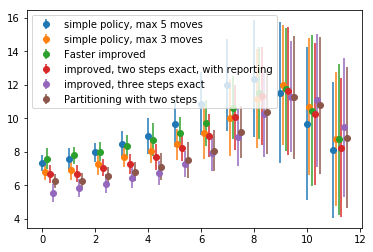

In [5]:
#import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
ax = plt.axes()
#ax.set_yscale("log")
lines = []
legend = []
n=0
lastpt = 12
for p, stats in player_stats.items():
    lines.append(\
        plt.errorbar(np.array(range(lastpt))+n,stats['mu'][0:lastpt], 
                     yerr=stats['std'][0:lastpt], fmt='o'))
    legend.append(p)
    n+= 0.1

plt.legend(lines,legend)
plt.show()

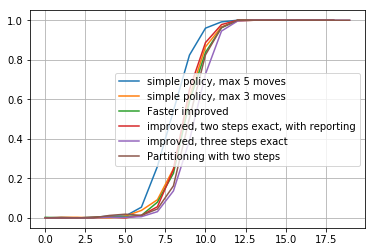

In [6]:
plt.figure()
ax = plt.axes()
#ax.set_yscale("log")
lines = []
legend =[]
for p, stats in player_stats.items():
    lines.append(\
        plt.plot(range(len(stats['mu'])),stats['strict_w_l']))
    legend.append(p)
plt.legend(legend)
plt.grid()
plt.show()